# Azure OpenAI Assistants - Code Interpreter

This notebook will find answers to a data set:
1. If 1 row in the dataset is 1 sighthing, what's our total sightings?
2. Which state has the most sightings?
3. Which season has the most sightings?
4. What are the top 10 years with the most sightings?
5. How many sightings did we have for Washington state in the year 2000?

Answers:
1. 5021
2. Washington (601)
3. Summer
4. 2004, 2005, 2006, 2003, 2000, 2007, 2008, 2012, 2001, 2011
5. 28

## Install Dependencies

In [ ]:
%pip install openai

## Load Azure Configuration

In [1]:
from dotenv import load_dotenv
import os

azure_openai_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
azure_openai_key = os.getenv("AZURE_OPENAI_KEY")
azure_openai_deployment = os.getenv("AZURE_OPENAI_DEPLOYMENT")
azure_openai_api_version = "2024-10-01-preview"

## Step 1-2:
1. Create an Assistant
2. Create a Thread

In [2]:
from openai import AzureOpenAI
import time

# Create an AzureOpenAI client
client = AzureOpenAI(
  azure_endpoint = azure_openai_endpoint,
  api_key= azure_openai_key,
  api_version=azure_openai_api_version
)

# Create a file
file = client.files.create(
  file=open("../Data/assistant/bigfootsightings.csv", "rb"),
  purpose='assistants'
)

# STEP 1: Create an assistant
assistant = client.beta.assistants.create(
  model=azure_openai_deployment,
  name="bigfootsightings",
  instructions="""You are an assistant answering questions about bigfootsightings dataset.""",
  tools=[{"type":"code_interpreter"}],
  tool_resources={"code_interpreter":{"file_ids":[file.id]}},
  temperature=1,
  top_p=1, 
)

# STEP 2: Create a thread
thread = client.beta.threads.create()


## Step 3-6: 
3. Add a message to the thread
4. Run the Assistant
5. Check the Run Status
6. Display the Assistant's Response

In [3]:
PROMPT_SUFFIX = """
- **ALWAYS** before giving the Final Answer, try another method.
Then reflect on the answers of the two methods you did and ask yourself
if it answers correctly the original question.
If you are not sure, try another method.
- If the methods tried do not give the same result,reflect and
try again until you have two methods that have the same result.
- If you still cannot arrive to a consistent result, say that
you are not sure of the answer.
- If you are sure of the correct answer, create a beautiful
and thorough response using Markdown.
- **DO NOT MAKE UP AN ANSWER OR USE PRIOR KNOWLEDGE,
ONLY USE THE RESULTS OF THE CALCULATIONS YOU HAVE DONE**.
- **ALWAYS**, as part of your "Final Answer", explain how you got
to the answer on a section that starts with: "\n\nExplanation:\n".
In the explanation, mention the column names that you used to get
to the final answer and provide the python code you used.

"""

user_question ="""If 1 row in the dataset is 1 sighting, what's our total sightings
"""

# STEP 3: Add a user question to the thread
message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content=PROMPT_SUFFIX + user_question
)

# STEP 4: Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# STEP 5: Check the run status
# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
  time.sleep(1)
  run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
  )
if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

# STEP 6: Display the Assistant's Response
content_block = messages.data[0].content[0]
value = content_block.text.value
print(value)


SyncCursorPage[Message](data=[Message(id='msg_fPGC9RVvLpP2WMAqp2jPQqCo', assistant_id='asst_XsJ4gMQwRlknQJa1ZhjvvwOb', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='The total number of sightings in the dataset is 5021.\n\n### Final Answer:\nThe total number of sightings recorded in the dataset is **5021**.\n\n### Explanation:\nTo determine the total number of sightings, I utilized the shape of the dataset, where each row represents one sighting. The code used to retrieve this information is as follows:\n\n```python\nimport pandas as pd\n\n# Load the dataset\ndata = pd.read_csv(file_path)\n\n# Get the total number of sightings\ntotal_sightings = data.shape[0]\n```\n\nThis code counts the number of rows in the dataset, confirming that there are 5021 individual sightings recorded.'), type='text')], created_at=1734247922, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_lqRvyXRTd

## Step 7: Appending Messages to the thread

In [4]:
user_question ="""Which state has the most sightings? Provide the number of sightings in that state
"""

# STEP 3: Add a user question to the thread
message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content=PROMPT_SUFFIX + user_question
)

# STEP 4: Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# STEP 5: Check the run status
# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
  time.sleep(1)
  run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
  )
if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

# STEP 6: Display the Assistant's Response
content_block = messages.data[0].content[0]
value = content_block.text.value
print(value)

SyncCursorPage[Message](data=[Message(id='msg_xvwyW5q8XsKfSPpeNlwp4Z2g', assistant_id='asst_XsJ4gMQwRlknQJa1ZhjvvwOb', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="The state with the most Bigfoot sightings is **Washington**, with a total of **601** sightings.\n\n### Final Answer:\nThe state that has the most sightings recorded in the dataset is **Washington**, with **601** sightings.\n\n### Explanation:\nTo determine which state has the most sightings, I used two methods:\n\n1. The first method involved counting the occurrences of sightings for each state using the `value_counts()` method on the 'state' column.\n2. The second method utilized the `groupby()` function combined with `size()` to aggregate the counts and then identified the state with the maximum count.\n\nHere is the Python code I used for both methods:\n\n```python\n# Method 1\nstate_sightings = data['state'].value_counts()\nmost_sightings_state = state_sightings.idxmax()\n

In [5]:
user_question ="""Which season has the most sightings?
"""

# STEP 3: Add a user question to the thread
message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content=PROMPT_SUFFIX + user_question
)

# STEP 4: Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# STEP 5: Check the run status
# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
  time.sleep(1)
  run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
  )
if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

# STEP 6: Display the Assistant's Response
content_block = messages.data[0].content[0]
value = content_block.text.value
print(value)

SyncCursorPage[Message](data=[Message(id='msg_zxYIbNjIW69R9uJmB9oBVsbE', assistant_id='asst_XsJ4gMQwRlknQJa1ZhjvvwOb', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="The season with the most Bigfoot sightings is **Summer**, with a total of **1867** sightings.\n\n### Final Answer:\nThe season that has the most sightings recorded in the dataset is **Summer**, with **1867** sightings.\n\n### Explanation:\nTo find out which season has the most sightings, I employed two methods:\n\n1. The first method involved counting occurrences of sightings for each season using the `value_counts()` method on the 'season' column.\n2. The second method utilized the `groupby()` function in combination with `size()` to aggregate the counts of sightings per season and then identified the season with the maximum count.\n\nHere is the Python code used for both methods:\n\n```python\n# Method 1\nseason_sightings = data['season'].value_counts()\nmost_sightings_seaso

In [8]:
user_question ="""
What are the top 10 years with the most sightings? 
Use the date column and get the year there.
Create a markdown table and a bar chart with the sightings in the Y-axis and years in the X-axis and save it to a file named top10.png.
Put the value on top of each bar.
"""

# STEP 3: Add a user question to the thread
message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content=PROMPT_SUFFIX + user_question
)

# STEP 4: Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# STEP 5: Check the run status
# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
  time.sleep(1)
  run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
  )
if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

# STEP 6: Display the Assistant's Response
content_block = messages.data[0].content[0]
value = content_block.text.value
print(value)

SyncCursorPage[Message](data=[Message(id='msg_rdjIgIv5mgFQkXDZOwVvZUPY', assistant_id='asst_XsJ4gMQwRlknQJa1ZhjvvwOb', attachments=[Attachment(file_id='assistant-fYrZ85PwbViKU9mrVoE8dqBO', tools=[CodeInterpreterTool(type='code_interpreter')])], completed_at=None, content=[TextContentBlock(text=Text(annotations=[FilePathAnnotation(end_index=1996, file_path=FilePath(file_id='assistant-fYrZ85PwbViKU9mrVoE8dqBO'), start_index=1969, text='sandbox:/mnt/data/top10.png', type='file_path')], value="The top 10 years with the most Bigfoot sightings are as follows:\n\n| Year | Sightings |\n|------|-----------|\n| 2004 | 241       |\n| 2005 | 209       |\n| 2006 | 176       |\n| 2003 | 152       |\n| 2000 | 146       |\n| 2007 | 145       |\n| 2008 | 141       |\n| 2012 | 141       |\n| 2001 | 131       |\n| 2011 | 121       |\n\n### Final Answer:\nThe top 10 years with the most sightings recorded in the dataset are detailed in the table above, with the year **2004** having the highest number of si

### Retrieve image output

In [10]:
print(content_block)

TextContentBlock(text=Text(annotations=[FilePathAnnotation(end_index=1996, file_path=FilePath(file_id='assistant-fYrZ85PwbViKU9mrVoE8dqBO'), start_index=1969, text='sandbox:/mnt/data/top10.png', type='file_path')], value="The top 10 years with the most Bigfoot sightings are as follows:\n\n| Year | Sightings |\n|------|-----------|\n| 2004 | 241       |\n| 2005 | 209       |\n| 2006 | 176       |\n| 2003 | 152       |\n| 2000 | 146       |\n| 2007 | 145       |\n| 2008 | 141       |\n| 2012 | 141       |\n| 2001 | 131       |\n| 2011 | 121       |\n\n### Final Answer:\nThe top 10 years with the most sightings recorded in the dataset are detailed in the table above, with the year **2004** having the highest number of sightings at **241**.\n\nA bar chart visualizing these sightings is created and saved as **top10.png**.\n\n### Explanation:\nTo determine the top 10 years with the most sightings, I followed these steps:\n\n1. Extracted the year from the 'date' column using the `pd.to_dateti

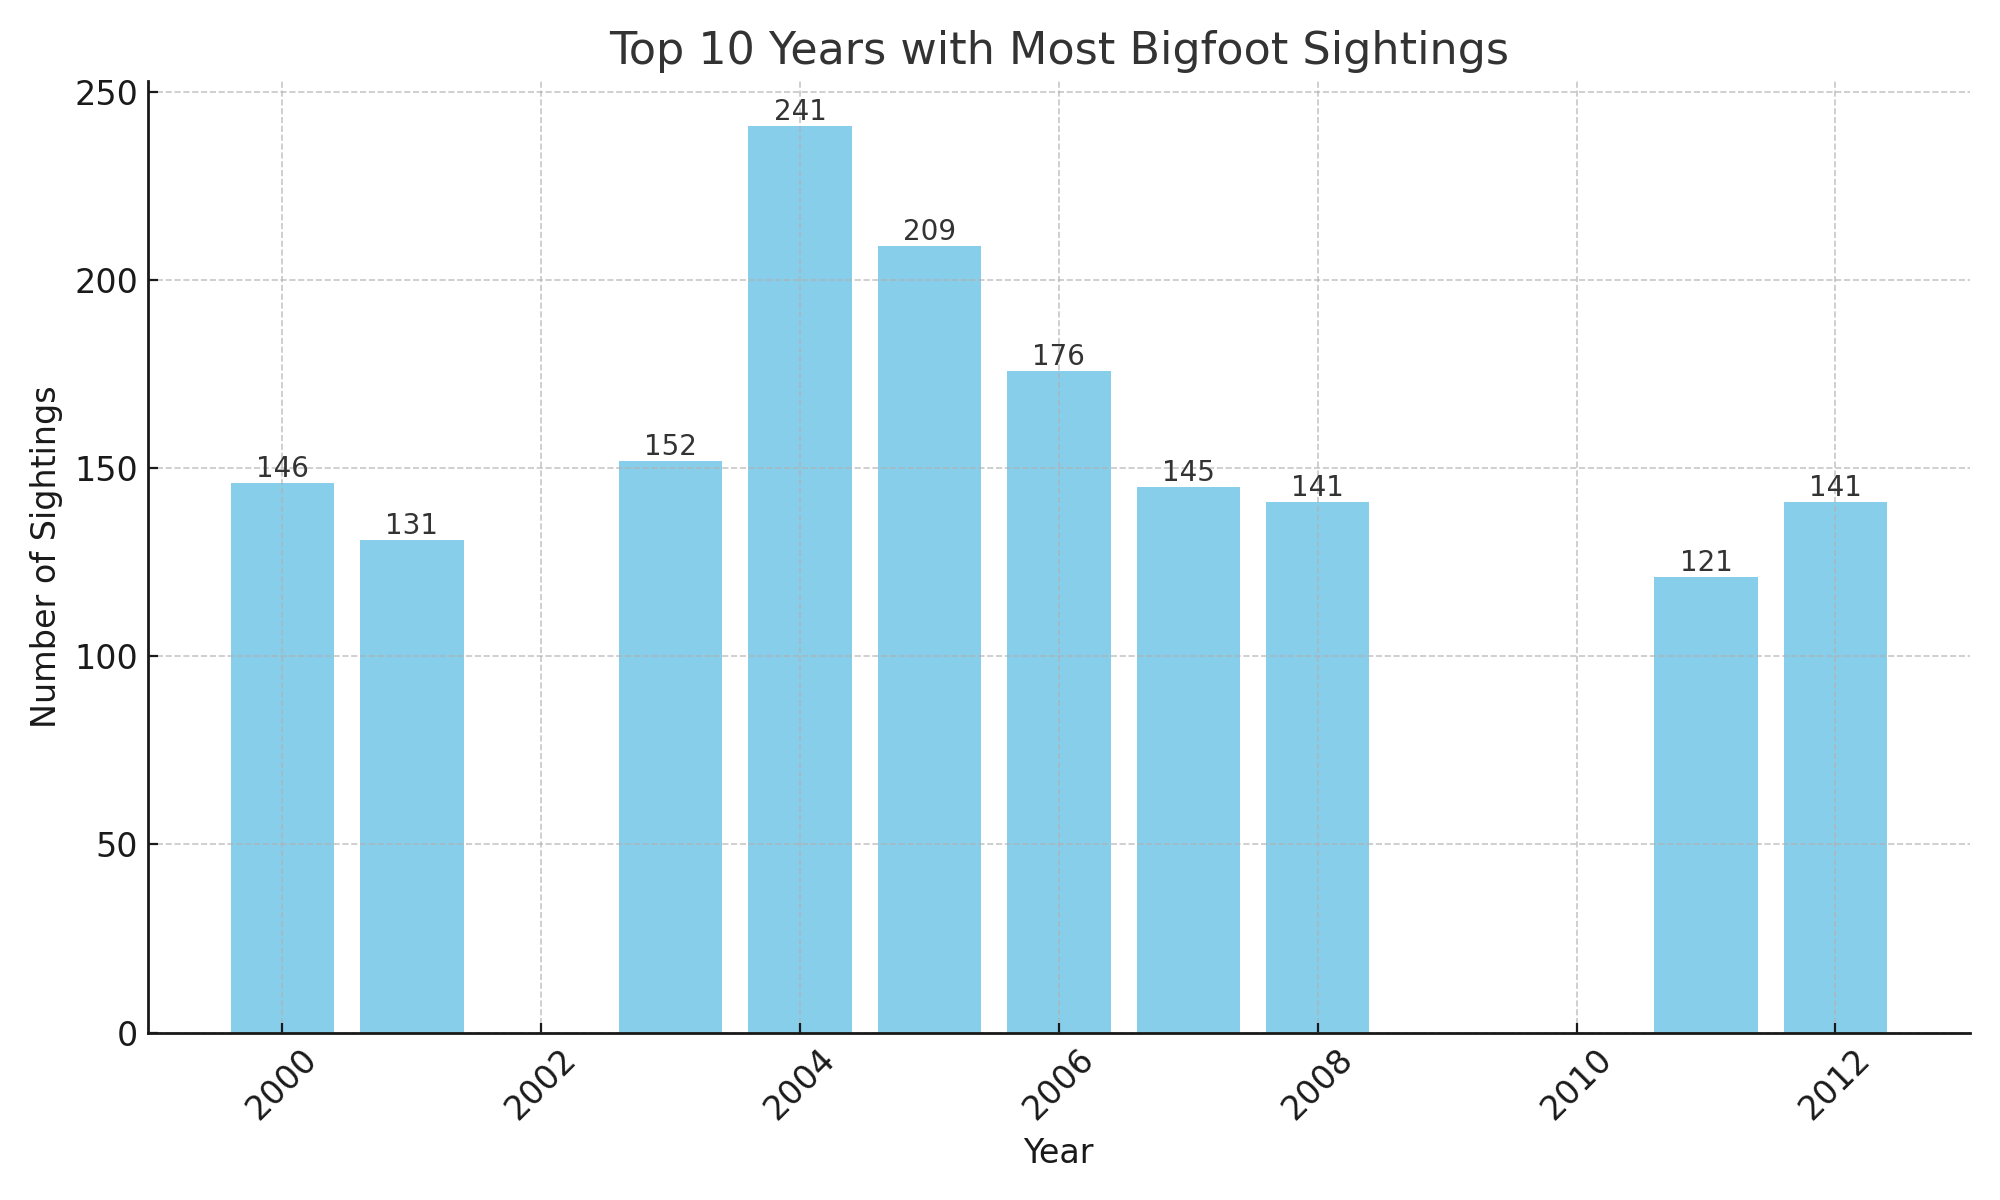

In [14]:
from PIL import Image
# enter the file_id inside content example: "assistant-fYrZ85PwbViKU9mrVoE8dqBO"
image_data = client.files.content(content_block.text.annotations[0].file_path.file_id)
image= image_data.write_to_file("top10.png")

# Display the image in the default image viewer
image = Image.open("top10.png")
image.show()

In [ ]:
user_question ="""How many sightings did we have for Washington state in the year 2000?
"""

# STEP 3: Add a user question to the thread
message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content=PROMPT_SUFFIX + user_question
)

# STEP 4: Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# STEP 5: Check the run status
# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
  time.sleep(1)
  run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
  )
if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

# STEP 6: Display the Assistant's Response
content_block = messages.data[0].content[0]
value = content_block.text.value
print(value)

In [ ]:
user_question ="""Using the "observed" column, are there any sightings observed at Mt. Mitchell?
"""

# STEP 3: Add a user question to the thread
message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content=PROMPT_SUFFIX + user_question
)

# STEP 4: Run the thread
run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id
)

# STEP 5: Check the run status
# Looping until the run completes or fails
while run.status in ['queued', 'in_progress', 'cancelling']:
  time.sleep(1)
  run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
  )
if run.status == 'completed':
  messages = client.beta.threads.messages.list(
    thread_id=thread.id
  )
  print(messages)
elif run.status == 'requires_action':
  # the assistant requires calling some functions
  # and submit the tool outputs back to the run
  pass
else:
  print(run.status)

# STEP 6: Display the Assistant's Response
content_block = messages.data[0].content[0]
value = content_block.text.value
print(value)

## Delete Assistant

In [15]:
response = client.beta.assistants.delete(assistant.id)